**FAST MASK DETECTION DATASET**


**A.1: Setting Up the Face Mask Detection Dataset**

In recent years, face mask detection has grown in importance for public health and safety. In this project, I'll walk you through the entire process of fine-tuning a vision model to determine if people are wearing masks or not using the Fastai library. We'll go over everything from data preparation to advanced training techniques using the structured approach described in the project requirements.


**We begin by installing all the necessary libraries:**

In [ ]:
!pip install gradio fastai torchvision kaggle --upgrade
!pip install -Uqq fastbook

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

The above code installs:

**gradio:** for Deployment.

**fastai:** a high-level deep learning library built on PyTorch.

**torchvision:** helpful tools and datasets for vision tasks.

**kaggle:** to download datasets from Kaggle.com.

**fastbook:** Fastai's companion library with helpful utilities.

# **A. General Steps**

**A.1. Download the Data**

*   To download a dataset from Kaggle, we need an API key:




In [ ]:
# Installing Kaggle again for convenience
!pip install -q kaggle

# Uploading my kaggle.json API key
from google.colab import files
files.upload()

# Moving kaggle.json to the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

# Unziping the dataset
!unzip -q face-mask-dataset.zip -d data

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data/data/with_mask/with_mask_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All


The above process makes sure we extract the dataset into a folder named data/

**A.1.1. Inspect the Data Layout**

In [ ]:
from pathlib import Path

base_path = Path("data")
for folder in base_path.iterdir():
    print(folder)

data/data


In [ ]:
from pathlib import Path

data_path = Path("data/data")
for folder in data_path.iterdir():
    print(folder.name, "->", len(list(folder.glob('*'))), "images")

without_mask -> 3828 images
with_mask -> 3725 images


The **Face Mask dataset** contains two folders, each corresponding to a class:

* **with_mask:** People wearing masks.

* **without_mask:** People not wearing masks.

This makes it easy to use Fastai's **parent_label** function, that automatically assigns labels based on folder names.

**A.1.2. Decide How to Create the DataBlock**

We will use a DataBlock with:

*   ImageBlock as input.
*   CategoryBlock as label.
*   Labels deduced from folder names.
*   Presizing and augmentations included.


**A.2. Create the DataBlock and Dataloaders**


In [ ]:
from fastai.vision.all import *

# DataBlock creation
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),  # Presizing
    batch_tfms=[*aug_transforms(size=224),
                Normalize.from_stats(*imagenet_stats)]
)

# Creating the Dataloaders
dls = dblock.dataloaders("data/data", bs=64)

The above code does the following:

* **ImageBlock, CategoryBlock:** Images with categorical labels (from folder names).

* **get_items=get_image_files:** It collects all image file paths.

* **splitter=RandomSplitter(...):** It randomly splits data into training (80%) and validation (20%) sets.

* **get_y=parent_label:** It extracts labels from folder names (with_mask, without_mask).

* **item_tfms=Resize(460):** It resizes all images to 460x460 before batching.

* **batch_tfms:** It applies augmentations and normalizes images using ImageNet stats.

As for the dataloaders:
* They load images from "data/data".

* Then creates batches of size 64 for training and validation.

* It then automatically applies all transforms and normalizations.

**A.3. Inspect the DataBlock via Dataloader**

A.3.1. Show a Batch

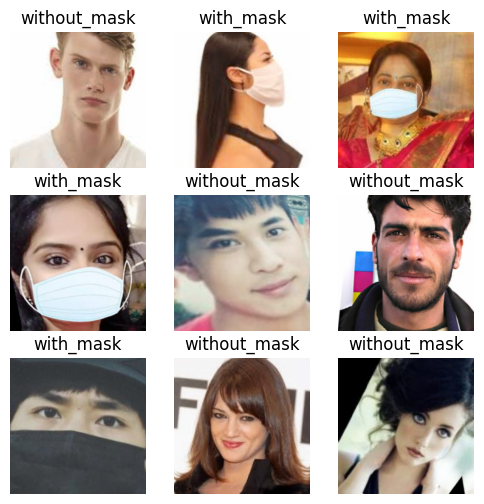

In [ ]:
dls.show_batch(max_n=9, figsize=(6,6))

* dls: This is our DataLoaders object. It contains preprocessed and tagged batches of picture data for training and validation.

* .show_batch(...): This function displays a collection of photos together with their associated labels.

* max_n=9: This shows up to nine photos from the batch.

The images shown are a random batch sampled from the training/validation set. Each image is displayed with its true label. This visualization is useful for:

* Ensuring that the data is accurately labeled.

* Checking to see if the photos were successfully preprocessed.

* Ensure that your training batches contain a wide mix of data.

**A.3.2. Check the Labels**

In [ ]:
print(dls.vocab)

['with_mask', 'without_mask']


**A.3.3** Summarize the DataBlock: dataloader.summary(path/data)

In [ ]:
dblock.summary(Path("data/data"))

Setting-up type transforms pipelines
Found 7553 items
2 datasets of sizes 6043,1510
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      data/data/with_mask/with_mask_3631.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=100x100
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      data/data/with_mask/with_mask_3631.jpg
    applying parent_label gives
      with_mask
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=100x100, TensorCategory(0))


Found 7553 items
2 datasets of sizes 6043,1510
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Setting up after_item: Pipeline: Resize --

The code above gives a full explanation of how Fastai's DataBlock pipeline processes photos for our dataset. It first collects 7,553 images and divides them into 6043 training and 1510 validation samples. Each image is labeled with its parent folder name (with mask or without mask) and transformed to a TensorCategory.

The transform pipeline includes:

* **Item transformation:** Resize each image to 460x460 and convert to a tensor.

* **Batch transforms:** Uses data augmentation techniques such as random horizontal flipping and brightness tweaking, then normalize the image with conventional ImageNet statistics. Images are scaled to 224x224 and fed into the model.

**A.4. Train a Simple Model**

A.4.1. Create a Benchmark

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.184614,0.036256,0.988079,00:50


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.045586,0.012833,0.996689,00:49


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


**Vision Learner:** This generates a convolutional neural network (CNN) for image classification with a pre-trained backbone like **resnet34**.

* **dls:** The DataLoaders object stores training and validation data for the face mask dataset.

* **ResNet 34:** This is a 34-layer residual network pretrained on ImageNet that will be used as the backbone for image feature extraction.

* **Metrics = Accuracy:** This allows the model to track categorization accuracy while training.


**Fine Tune (1):** This method trains the model in two steps:

       Epoch 1: ResNet34 is frozen, with only the classification component trained.

       Epoch 2: The model is completely unfrozen and fine-tuned.


**As for the result of the model:** This Fastai training approach creates a CNN for face mask classification using vision_learner and a pre-trained ResNet34 backbone. The model employs accuracy as an assessment metric and is trained using mixed precision (.to_fp16()) to increase performance and memory efficiency, making it suited for environments such as Google Colab.

The model was fine-tuned in two steps:

* Stage 1 (frozen): Only the classification head was taught, with the backbone remaining frozen. After this step, the model's validation accuracy was about 98%, with a small validation loss.

* Stage 2 (unfrozen): The entire network underwent fine-tuning. Performance improved even further, with a validation accuracy of about 99.% and a small validation loss.

These findings suggest significant generalization and that fine-tuning the deeper layers aids in the effective acquisition of task-specific characteristics.

**NOTE:** Due to randomness in training, results may vary significantly across runs.


**A.4.2. Interpret the Model**

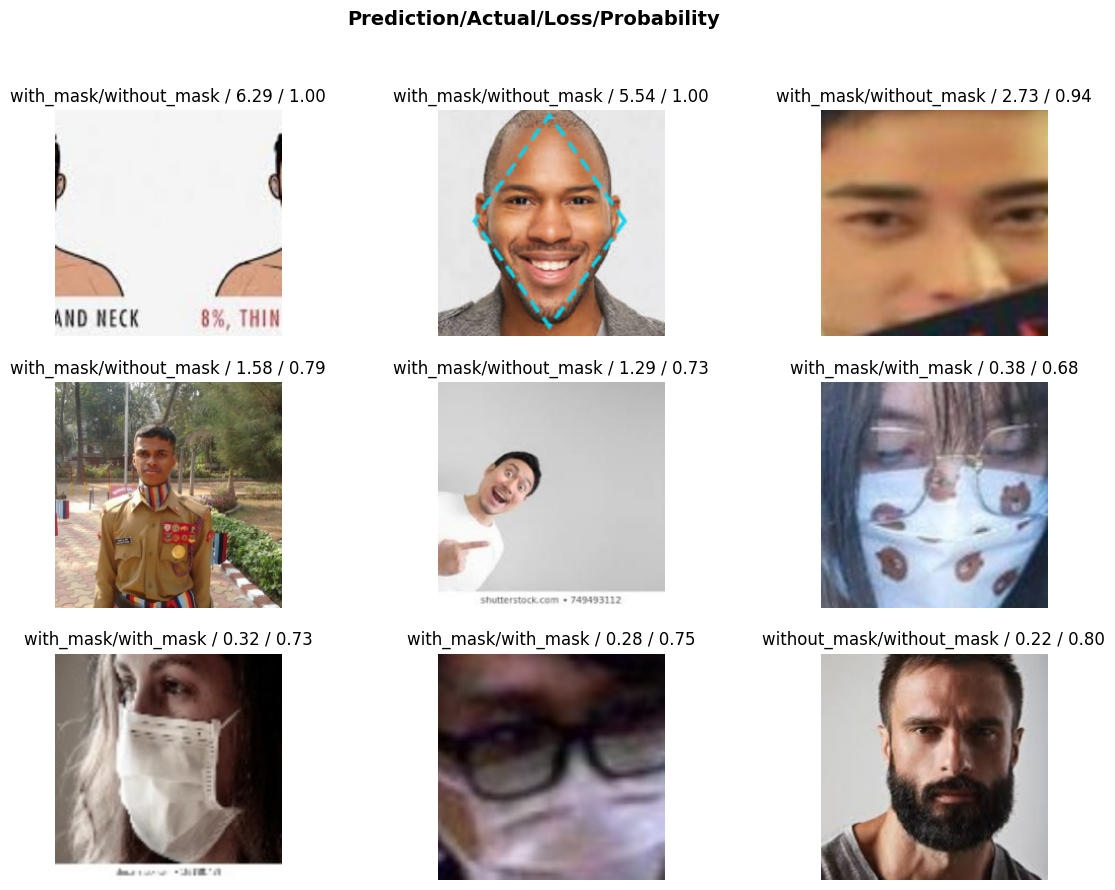

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(14,10))

The above image shows the model's predictions comparing **predicted vs actual labels** along with the associated loss and confidence (probability). We see some of the model's shortcomings below:

* The model has various misclassifications, specifically predicting **"with_mask"** when the correct label is **"without_mask"** and vice versa. This can be shown in images above where faces are partially obscured (e.g., by sunglasses, hands etc), which may confuse the model.

* Another clear misclassification is in the subject is wearing a blue skincare mask rather than a protective face mask, indicating a weakness in discriminating between different forms of facial coverings.

* Correct classifications typically have lower loss and a higher probability, indicating that the model performs better when faces are clear and typical mask patterns are present.



**A.4.3. Confusion Matrix**

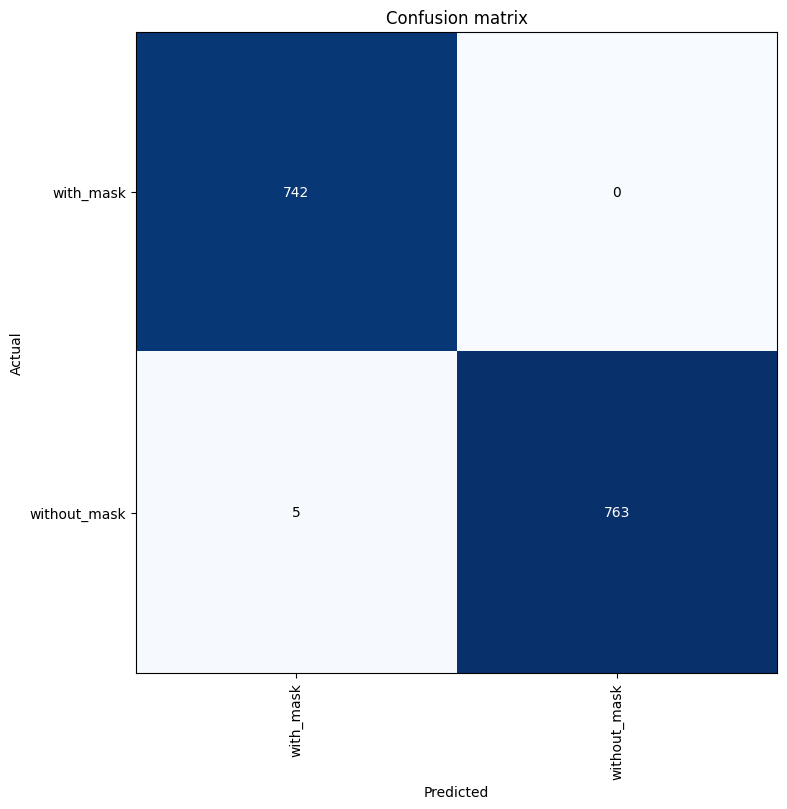

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8))

We see that the Confusion Matrix shows that our model's performance is quite good given the outputs it displays. Lets dive into what each of them translates to: Our model **with mask** predicted almost 98% right given out of 741, it got 738 right and **without mask** almost 98% right given out of 768, it got 765 right. This is a good result for any model being trained because it tells us that we are in the right direction of our training.

# **B. Advanced Techniques**

**B.1. Learning Rate Finder**


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SuggestedLRs(valley=0.00015848931798245758)

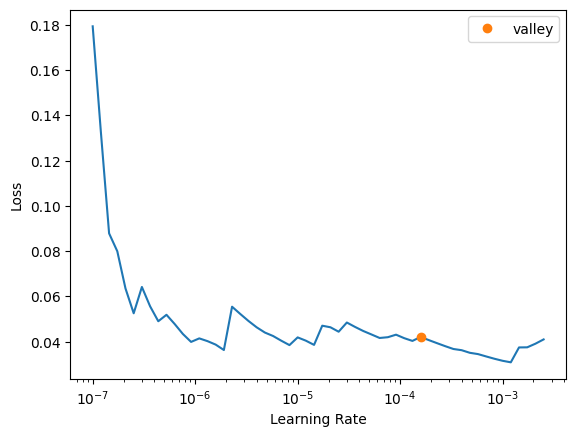

In [ ]:
learn.lr_find()

The **learn.lr_find()** function aids in the determination of the ideal learning rate for neural network training. This function steadily increases the learning rate during training while monitoring loss. The graph depicts Loss on the y-axis and Learning Rate on the x-axis.


**As for the model's Output:** The graph shows that the loss drops as the learning rate grows.

 **B.1.1 & B.1.2**
*   Big lr = divergence.
*   Small lr = slow training --> overfitting.


    

**B.2. Finder Algorithm**
*   Handled by **lr_find()** in Fastai. Starts small and increases exponentially, plotting loss.




**B.3. Transfer Learning**

In [ ]:
# Freezing happening here
learn.freeze()
learn.fit_one_cycle(1, 3e-3)

# Unfreezing
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-5,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.036111,0.006139,0.998676,00:52


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.038532,0.010200,0.998013,00:50
1,0.028129,0.001093,0.999338,00:49


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


* **Learn.freeze():** This freezes the model's pretrained layers except for the final classification layers. This is usually good for early training since it allows the new head to adapt to our dataset while keeping the pretrained features.

* **learn.fit_one_cycle(1, 3e-3):** This trains only the model's head for one epoch with the 1cycle learning rate, starting at a learning rate of 3e-3.

* **learn.unfreeze():** This unfreezes all layers, including the pretrained ones which then allows our model to fine-tune itself to the dataset.

* **Learn.fit_one_cycle(2, lr_max=slice(1e-5, 1e-3)):** This trains for two additional epochs using a differential learning rate:

      Early layers have a lower learning rate (1e-5).

      Final layers have a greater learning rate (1e-3).
      This helps to keep relevant pretrained properties while changing the network.


**As for the model's Output:** After freezing and training only the model's head, it easily reached a validation accuracy of roughly 99% in just one epoch, showing that the pretrained ResNet34 features were already extremely successful for our dataset. That being said, the complete model was unfrozen and fine-tuned over two more epochs which resulted in a modest reduction in training loss. Throughout this process, the validation accuracy remained continuously high, reaching 99%. This shows that the model generalized effectively with minimum overfitting and learned very efficiently in both the frozen and unfrozen training phases.

**B.4. Discriminative Learning Rates**

We used:

In [ ]:
lr_max=slice(1e-5, 1e-3)

**lr_max=slice(1e-5, 1e-3)** is used to fine-tune a model using discriminative learning rates. This means that different layers of the neural network will be trained at varying learning rates.

* The earlier **frozen** layers are updated very slowly (at a learning rate of approximately 1e-5).

* Later **unfrozen** layers that were closer to the classification head, can learn at a quicker pace (up to 1e-3).

**B.5. Deciding Epochs**

We choose 3 total epochs based on learning rate plot and validation accuracy.


**B.6. Model Capacity**

**B.6.1 & B.6.2**

*   We use smaller batch size (64) to avoid memory issues.
*   We could try deeper models like ResNet50, adjusting batch size.


**B.6.3. Mixed Precision**

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

**B.7. Weight Initialization**

Fastai uses PyTorch defaults. For ReLU networks, that means Kaiming He initialization.

In [ ]:
import torch.nn as nn
from torch.nn import init

def apply_kaiming(m):
    if isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

model = resnet34()
model.apply(apply_kaiming)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

We showed how to manually do Kaiming initialization on all convolutional layers in a ResNet34 model. It defines a function **apply_kaiming** which determines whether a layer is of type **nn.Conv2d** uses **kaiming_normal_** on its weights, with values optimized for ReLU activations. The ResNet34 model is then instantiated, and the function is applied recursively to all levels **via.apply**(). This guarantees that all convolutional weights are appropriately initialized prior to training, which can assist prevent vanishing or expanding gradients, particularly when starting from scratch.

**As for the model's Output:** This displays the complete architecture of an untrained ResNet34 model with manually initialized convolutional layers. It starts with early processing layers (conv1, bn1, relu, maxpool), followed by four primary residual blocks (layers 1-4), each with numerous BasicBlock modules. These include convolutional and batch normalization layers, which are frequently followed by downsampling in the first block of the layer group. The network ends with global average pooling and a fully connected layer that outputs 1000 classes, as is customary for ImageNet. While this version utilizes the default classifier head, it can be changed during transfer learning.



---



# Save The dataset

In [ ]:
from fastai.vision.all import *

learn.export("model.pkl")

# Gradio App

In [ ]:
from fastai.vision.all import *
import gradio as gr

# Load the exported model
learn_inf = load_learner("model.pkl")

# Define labels
labels = learn_inf.dls.vocab

# Inference function
def classify_image(img):
    img = PILImage.create(img)  # Convert to Fastai-compatible image
    pred, idx, probs = learn_inf.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

# Gradio interface
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="Face Mask Classifier",
    description="Upload an image to detect if the person is wearing a face mask, no mask, or wearing incorrectly.",
    theme="huggingface"
)

interface.launch()

# **Author:**

    Hussein Abdikarim Hussein


